#### Equipo: 2 Grupo: 002

Integrantes:

1732753 Altamirano Romo Lizbeth Guadalupe

1725005 García Tamez Juan Manuel

1813599 González Baltazar Joel Gerardo

1797033 Herrera Dueñas Roberto Eduardo

# Pokemon

### 1) Título de Base de Datos

a) Pokemon Stats

b) www.kaggle.com/abcsds/pokemon

### 2) Descripción de los datos 

Número de Pokedex (INT)

Nombre de Pokemon (STRING)

Tipo 1 (STRING)

Tipo 2 (STRING)

Total (INT)

HP (INT)

Attack (INT)

Defense (INT)

Sp. Atk (INT)

Sp. Def (INT)

Speed (INT)

### 3) Justificación del uso de datos


Lo primero que nos llamo la atención de esta base de datos es que conocemos casi todos los datos y sabemos de que trata el juego, debido a esto nos llamo la atención de los puntajes de ataque y defensa, y con estos datos númericos poder manipularlos para llegar a un objetivo.

### 4) Objetivo Final 

OBJETIVO PRINCIPAL:
Pronosticar el pokemon que debemos usar para lograr ganar algún tipo de combate tomando en cuenta el tipo de pokemon, el puntaje total, el ataque y la defensa.

OBJETIVO SECUNDARIO:
Ordenar los pokemon por tipo (agua, fuego, tierra, lucha, etc).
Seleccionar 3 de cada tipo y mostrar cual es el mas eficaz.


### 5 Preguntas de Interes

¿Cuáles son los de mayor eficaz respecto a otro?

¿Por qué la eficacia es mayor? 

## Desarrollo de las herramientas 


1. Limpieza de datos

Datos sin manipulación, en esta parte solo se muestran los datos excatamente iguales exportados de excel a python.

In [1]:
import pandas as pd
d = pd.read_csv('Pokemon.csv')
d.head() #muestra las primeras 4 filas de la base de datos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
d.tail() #muestra las ultimas 4 filas de la base de datos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


En este siguiente paso se eliminan las columnas que no son necesarias para realizar nuestro objetivo.

In [3]:
d.drop(columns='Legendary',inplace=True) #Se elimina la columan llamada LEGENDARY
d.drop(columns='Generation',inplace=True) #Se elimina la columna llamada GENERATION
d.head() #se muestran las primeras 4 filas son las columnas eliminadas.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [4]:
d.tail() #se muetsran las ultimas 4 filas sin las columnas eliminadas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70


In [5]:
d.isnull().any() #Datos vacios sin manipulación

#          False
Name       False
Type 1     False
Type 2      True
Total      False
HP         False
Attack     False
Defense    False
Sp. Atk    False
Sp. Def    False
Speed      False
dtype: bool

In [6]:
d.isnull().sum() #Datos completos con valores cero.

#            0
Name         0
Type 1       0
Type 2     386
Total        0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
dtype: int64

In [7]:
d = d.fillna('NA') #Se llenan las celdas no numericas vacias con las letras NA
dnew = d.fillna(0) #Se llenan las celdas numericas vacias con el valor 0
d

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NA,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80


In [8]:
import pandas as pd

d = pd.read_csv('Pokemon.csv')
d.head()

d.drop(columns='Legendary',inplace=True)
d.drop(columns='Generation',inplace=True)
d.head()

d = d.fillna('No hay')
d.head()

d.to_csv('Pokemon_limpio.csv', index=False)


#El archivo nuevo se ha creado y ahora lo podemos usar ya que se ha modificaco para nuestro uso y beneficio 

2. Estadística básica

#### (Speed)

count    800.000000

mean      71.902500

std       27.828916

min       20.000000

25%       50.000000

50%       70.000000

75%       90.000000

max      230.000000

Name: Sp. Def, dtype: float64

#### (Ataque)

count    800.000000

mean      79.001250

std       32.457366

min        5.000000

25%       55.000000

50%       75.000000

75%      100.000000

max      190.000000

Name: Attack, dtype: float64

De la práctica Num. 2 recabamos la información de (Velocidad, Ataque) para así hacer las gráficas necesarias para visualizar mejor la información y enfocar nuestro objetivo de proponer el mejor pokemon para derrotar al pokemon rival.

3. Gráficas

In [11]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
pok = pd.read_csv('Pokemon_limpio.csv')

<AxesSubplot:ylabel='Frequency'>

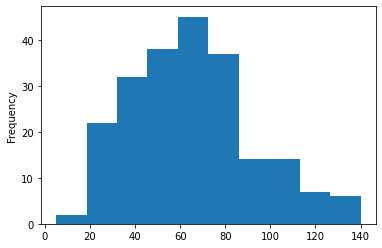

In [12]:
pok[pok['Speed'] < 50]['Attack'].plot.hist()

En esta gráfica la usamos para tomar los valores del intervalo de 60 a 80, dado que nos da los pokemones con mayor ataque y velocidad para mayor eficacia contra el rival y de los pokemones encontrados en ese intervalo vamos a extraer a los 5 más fuertes de cada tipo de pokemon.

<AxesSubplot:xlabel='Speed', ylabel='Attack'>

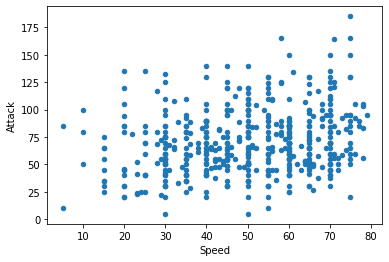

In [13]:
pok[pok['Speed'] < 80].plot.scatter(x='Speed', y='Attack')

Esta gráfica de puntos la usamos para ver que tan dispersos estan los tipos de pokemon en relación a ataque y velocidad para la hora de elegir a los 5 de cada tipo, exista una cantidad suficiente y justa.

<AxesSubplot:>

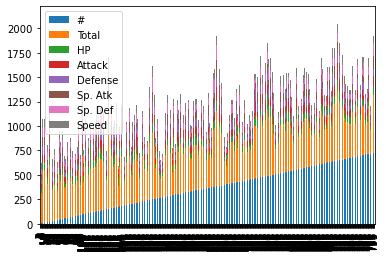

In [15]:
pok.plot.bar(stacked=True)

En este gráfico quisimos ver en intervalos las cantidades acumuladas de todos los pokemon y enfocarnos en los picos más altos para filtrar en que intervalos los pokemones son mas fuertes.

<AxesSubplot:>

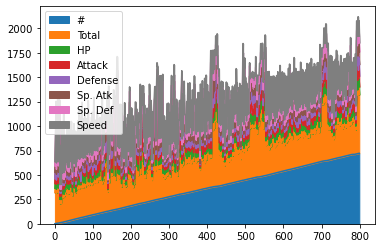

In [16]:
pok.plot.area()

Y por último en este gráfico hicimos resaltar la velocidad de ataque de toda la lista de los pokemon para verificar que los resultados anteriores estén acorde a este último gráfico dado que es mas visual a la hora de filrar la lista.

Como conclusión, cambiamos de estrategia en la busqueda de los datos del puntaje de ataque y defensa, a buscar el ataque y la velocidad, ya que al buscar un pokemon para atacar con eficacia para vencer a tu rival encontramos que el pokemon con mayor ataque y velocidad en convinación del tipo de pokemon es mas fácil simplificar la lista.

# Videojuegos

## 1) Título de Base de Datos

a) Videogames sales

b) www.kaggle.com/migeruj/videogames-predictive-model

## 2) Descripción de los datos

Plataforma (string)

Género (string)

Editor (string)

Número de ventas América Nte (int)

Número de ventas Europa (int)

Número de ventas Japón(int)

Ventas totales(int)

Clasificación ESRB (string)

Puntuación de la crítica (string)

## 3) Justificación del uso de datos

Para este proyecto tomamos mucho en cuenta las personas gamers que cada que sale un video juego nuevo son las más interesadas
en este tipo de reseñas o ayudas, ya que les dá una referencia para adquirir o no el video juego, ya que ayuda un poco a la 
economía del jugador, nuestro objetivo con el usuario es dar un buena recomendación para futuros jugadores y compradores de 
este tipo de juegos que son adquisidores de diferentes consolas de videojuegos.

## 4) Objetivo final

Dar un listado de los juegos con mejores críticas y ventas alrededor del mundo,
clasificando por géneros para brindar mejor información y recomendación para futuros jugadores que deseen comprar algún 
videojuego de cierto género en específico.

## Desarrollo de las herramientas 

1. Limpieza de datos

In [17]:
import pandas as pd
d2 = pd.read_csv('dato.csv')
d2.head()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","8,45","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","3,29","35,57",E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","2,95","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","2,88","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","2,84","28,92",E,Malo


In [18]:
d2.tail()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
7107,PC,Action,Ubisoft,0,0,0,0,"0,01",T,Excelente
7108,PC,Shooter,Midway Games,0,0,0,0,"0,01",T,Aceptable
7109,PC,Sports,Sega,0,0,0,0,"0,01",E,Aceptable
7110,PC,Strategy,Take-Two Interactive,0,0,0,0,"0,01",E10+,Aceptable
7111,PS4,Platform,Team Meat,0,0,0,0,"0,01",T,Excelente


In [19]:
d2.drop(columns='Other_Sales',inplace=True)
d2.head()
# Eliminamos la columna Other Sales porque nos queremos enfocar en las ventas de países más importantes.

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,"41,36","28,96","3,77","82,54",E,Bueno
1,Wii,Racing,Nintendo,"15,68","12,8","3,79","35,57",E,Excelente
2,Wii,Sports,Nintendo,"15,61","10,95","3,28","32,78",E,Excelente
3,DS,Platform,Nintendo,"11,28","9,15","6,5","29,81",E,Excelente
4,Wii,Misc,Nintendo,"13,96","9,18","2,93","28,92",E,Malo


In [20]:
d2.tail()

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Rating,Critic_Score_Class
7107,PC,Action,Ubisoft,0,0,0,"0,01",T,Excelente
7108,PC,Shooter,Midway Games,0,0,0,"0,01",T,Aceptable
7109,PC,Sports,Sega,0,0,0,"0,01",E,Aceptable
7110,PC,Strategy,Take-Two Interactive,0,0,0,"0,01",E10+,Aceptable
7111,PS4,Platform,Team Meat,0,0,0,"0,01",T,Excelente


In [21]:
d2.isnull().any()

Platform              False
Genre                 False
Publisher             False
NA_Sales              False
EU_Sales              False
JP_Sales              False
Global_Sales          False
Rating                False
Critic_Score_Class    False
dtype: bool

In [22]:
d2.isnull().sum()

Platform              0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Global_Sales          0
Rating                0
Critic_Score_Class    0
dtype: int64

In [23]:
import pandas as pd

d2 = pd.read_csv("dato.csv")
d2.head()

d2.drop(columns='Other_Sales', inplace=True)
d2.head()

d2.to_csv('dato_limpio.csv', index=False)

In [25]:
#Cambiamos Los valores de object a float
d2['NA_Sales'] = d2['NA_Sales'].str.replace(",", ".")
d2['NA_Sales'] = d2['NA_Sales'].astype(float) 

d2['EU_Sales'] = d2['EU_Sales'].str.replace(",", ".")
d2['EU_Sales'] = d2['EU_Sales'].astype(float)

d2['JP_Sales'] = d2['JP_Sales'].str.replace(",", ".")
d2['JP_Sales'] = d2['JP_Sales'].astype(float)

d2['Global_Sales'] = d2['Global_Sales'].str.replace(",", ".")
d2['Global_Sales'] = d2['Global_Sales'].astype(float)


2. Estadistica básica de los datos

In [27]:
#Promedio
print(d2['NA_Sales'].mean())
print(d2['EU_Sales'].mean())
print(d2['JP_Sales'].mean())
print(d2['Global_Sales'].mean())

0.38856721034872505
0.2325365579302462
0.06265185601799672
0.7653065241844924


In [28]:
print() #Suma o totales

print(d2['NA_Sales'].sum())
print(d2['EU_Sales'].sum())
print(d2['JP_Sales'].sum())
print(d2['Global_Sales'].sum())


2763.4900000000002
1653.8000000000002
445.58
5442.860000000001


In [29]:
print() #Funcion acumulada

print(d2['NA_Sales'].cumsum())
print(d2['EU_Sales'].cumsum())
print(d2['JP_Sales'].cumsum())
print(d2['Global_Sales'].cumsum())


0         41.36
1         57.04
2         72.65
3         83.93
4         97.89
         ...   
7107    2763.49
7108    2763.49
7109    2763.49
7110    2763.49
7111    2763.49
Name: NA_Sales, Length: 7112, dtype: float64
0         28.96
1         41.76
2         52.71
3         61.86
4         71.04
         ...   
7107    1653.80
7108    1653.80
7109    1653.80
7110    1653.80
7111    1653.80
Name: EU_Sales, Length: 7112, dtype: float64
0         3.77
1         7.56
2        10.84
3        17.34
4        20.27
         ...  
7107    445.58
7108    445.58
7109    445.58
7110    445.58
7111    445.58
Name: JP_Sales, Length: 7112, dtype: float64
0         82.54
1        118.11
2        150.89
3        180.70
4        209.62
         ...   
7107    5442.82
7108    5442.83
7109    5442.84
7110    5442.85
7111    5442.86
Name: Global_Sales, Length: 7112, dtype: float64


In [30]:
print() #Mediana

print(d2['NA_Sales'].median())
print(d2['EU_Sales'].median())
print(d2['JP_Sales'].median())
print(d2['Global_Sales'].median())


0.15
0.06
0.0
0.29


In [31]:
print() #Varianza

print(d2['NA_Sales'].var())
print(d2['EU_Sales'].var())
print(d2['JP_Sales'].var())
print(d2['Global_Sales'].var())



0.9100821684535865
0.4624383125431987
0.08035792237318368
3.7507768431695867


In [32]:
print() #Descripcion con max y min y mas cosas

print(d2['NA_Sales'].describe())
print(d2['EU_Sales'].describe())
print(d2['JP_Sales'].describe())
print(d2['Global_Sales'].describe())


count    7112.000000
mean        0.388567
std         0.953982
min         0.000000
25%         0.060000
50%         0.150000
75%         0.390000
max        41.360000
Name: NA_Sales, dtype: float64
count    7112.000000
mean        0.232537
std         0.680028
min         0.000000
25%         0.020000
50%         0.060000
75%         0.202500
max        28.960000
Name: EU_Sales, dtype: float64
count    7112.000000
mean        0.062652
std         0.283475
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         6.500000
Name: JP_Sales, dtype: float64
count    7112.000000
mean        0.765307
std         1.936692
min         0.010000
25%         0.110000
50%         0.290000
75%         0.742500
max        82.540000
Name: Global_Sales, dtype: float64


Estas nos facilitan el conseguir resultados necesarios para los cálculos y análisis estadísticos y ver 
como se comportan nuestros datos.

3. Gráficas

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

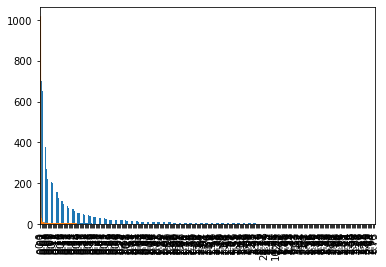

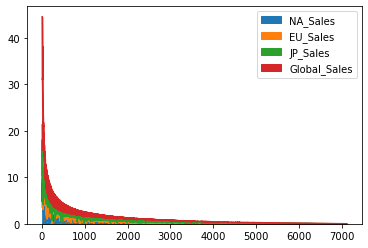

In [36]:
d2['NA_Sales'].value_counts().plot.line()
d2['EU_Sales'].value_counts().plot.line()

d2['NA_Sales'].value_counts().plot.bar()
d2['EU_Sales'].value_counts().plot.bar()


d2[d2['NA_Sales'] < 10].plot.area()

Estas dos gráficas nos ayudan a comprar las ventas en las partes del mundo.

<AxesSubplot:xlabel='NA_Sales', ylabel='Global_Sales'>

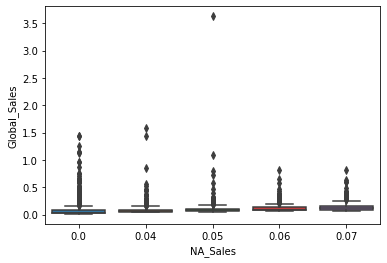

In [37]:
sf = d2[d2.NA_Sales.isin(d2[d2['NA_Sales'] <5]['NA_Sales'].value_counts().head(5).index)]
sns.boxplot(
    x='NA_Sales',
    y='Global_Sales',
    data=sf
)

Nos ayuda para conocer la dispersión de nuestros datos de cada venta "local" en las ventas globales.

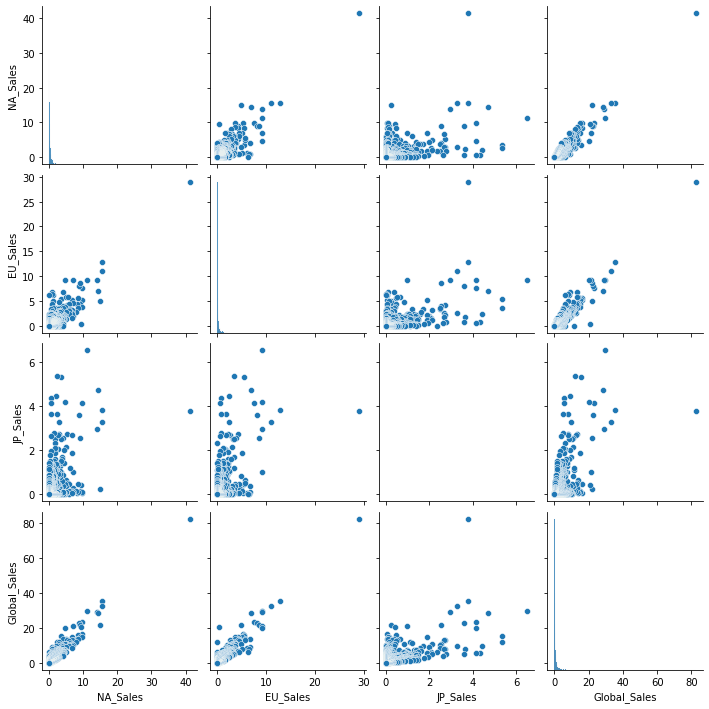

In [38]:
sns.pairplot(d2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']])

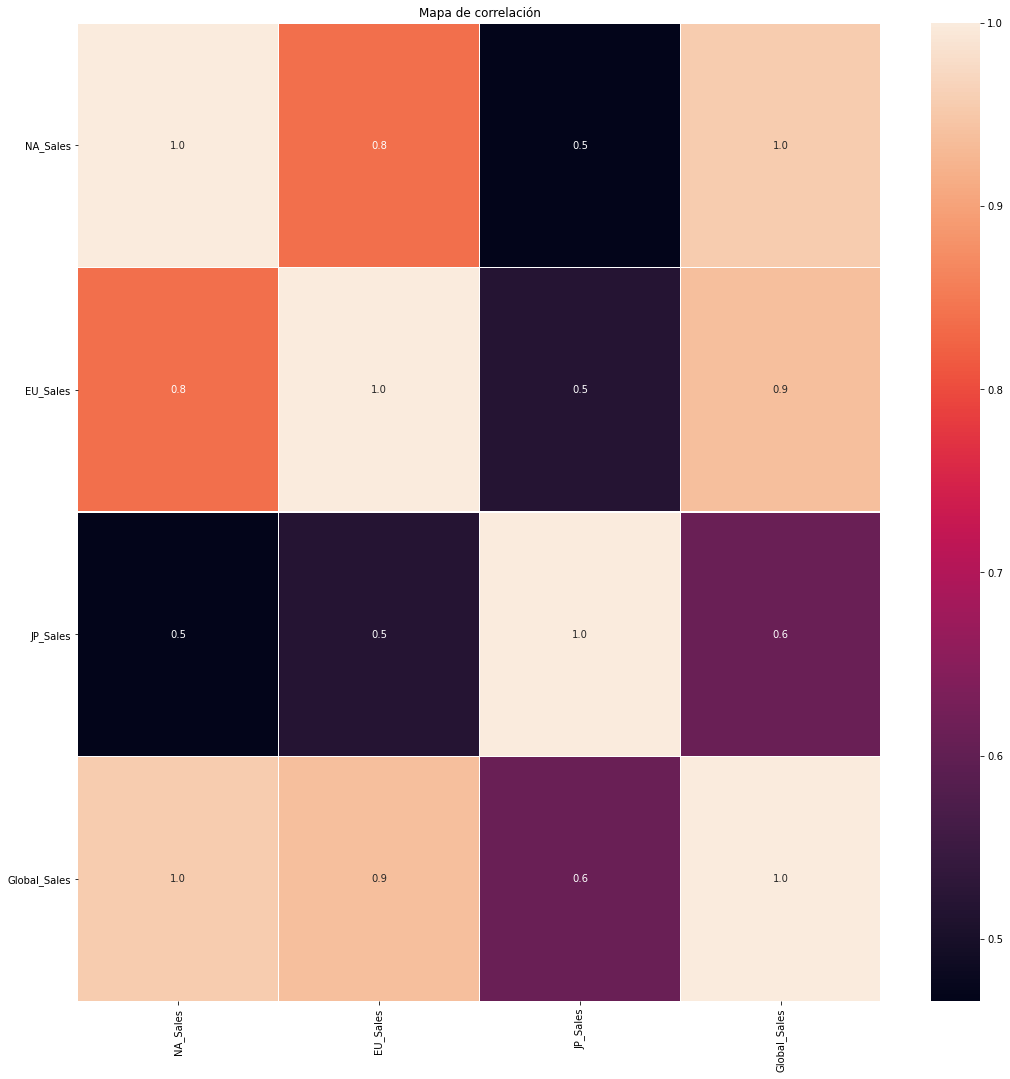

In [39]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(d2.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Con estas gráficas podemos ver las relaciones y en donde convergen mis datos, así puedo hacer más rápido comparaciones.

Como conclusión, con todas las gráficas podemos ver como se comportan en ventas nuestros datos y ver en donde se vende mas, en comparación o como se dispersa las ventas y asi conseguir nuestras conclusiones de analisis de los nichos de mercado.